In [1]:


import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

In [3]:


# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)



img1 height720
img1 width1280
img2 height720
img2 width1280


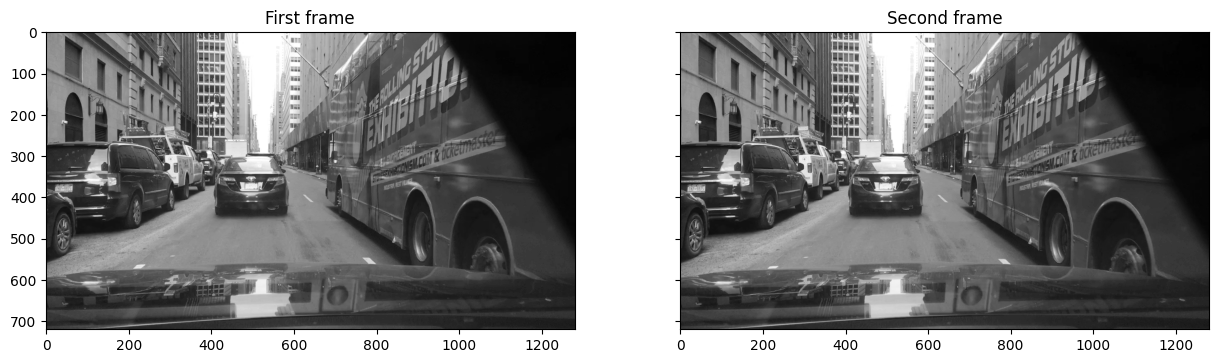

In [4]:


SHOW_DEBUG_STEPS  = True

# Reading video 
cap = cv2.VideoCapture('Videos/0010bf16-9ee17cd9.mov')

# if video is not present, show error
if not(cap.isOpened()):
    print("Error reading file")

# Check if you are able to capture the video    
ret, fFrame  = cap.read()

# Capturing 2 consecutive frames and making a copy of those frame. Perform all operations on the copy frame. 
ret, fFrame1 = cap.read()
ret, fFrame2 = cap.read()
img1 = fFrame1.copy()
img2 = fFrame2.copy()

if(SHOW_DEBUG_STEPS):
    print ('img1 height' + str(img1.shape[0]))
    print ('img1 width' + str(img1.shape[1]))
    print ('img2 height' + str(img2.shape[0]))
    print ('img2 width' + str(img2.shape[1]))

# Convert the colour images to greyscale in order to enable fast processing    
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#plotting
plot_image([img1, img2], cmap='gray', captions=["First frame", "Second frame"])



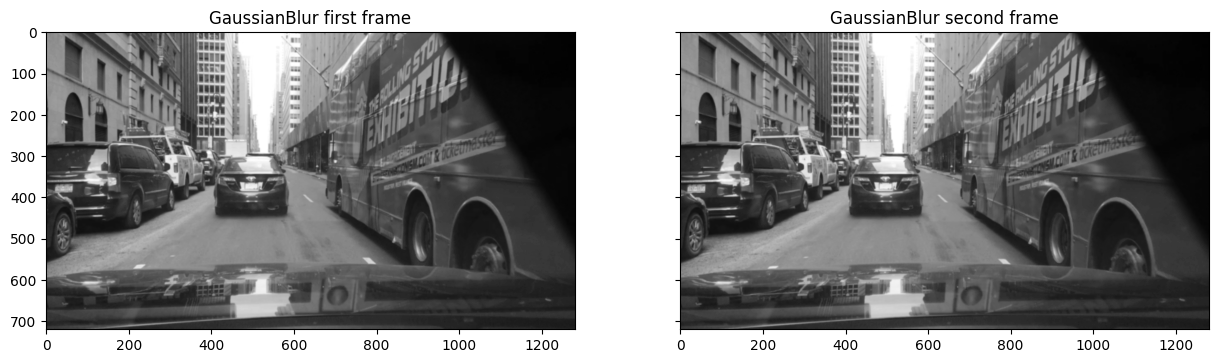

In [5]:
# Add some Gaussian Blur
img1 = cv2.GaussianBlur(img1,(5,5),0)
img2 = cv2.GaussianBlur(img2,(5,5),0)

#plotting
plot_image([img1, img2], cmap='gray', captions=["GaussianBlur first frame", "GaussianBlur second frame"])

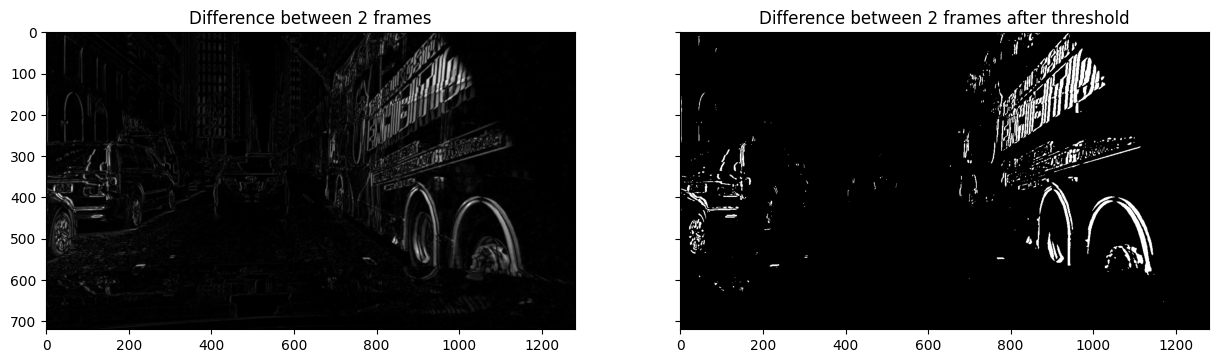

In [6]:


# This imgDiff variable is the difference between consecutive frames, which is equivalent to detecting movement
imgDiff = cv2.absdiff(img1, img2) 

# Thresholding the image that is obtained after taking difference. Pixel value below 30 will be set as 0(black) and above as 255(white)
ret,imgThresh = cv2.threshold(imgDiff,30.0,255.0,cv2.THRESH_BINARY)
ht = np.size(imgThresh,0)
wd = np.size(imgThresh,1)
plot_image([imgDiff, imgThresh], cmap='gray', captions = ["Difference between 2 frames", "Difference between 2 frames after threshold"])



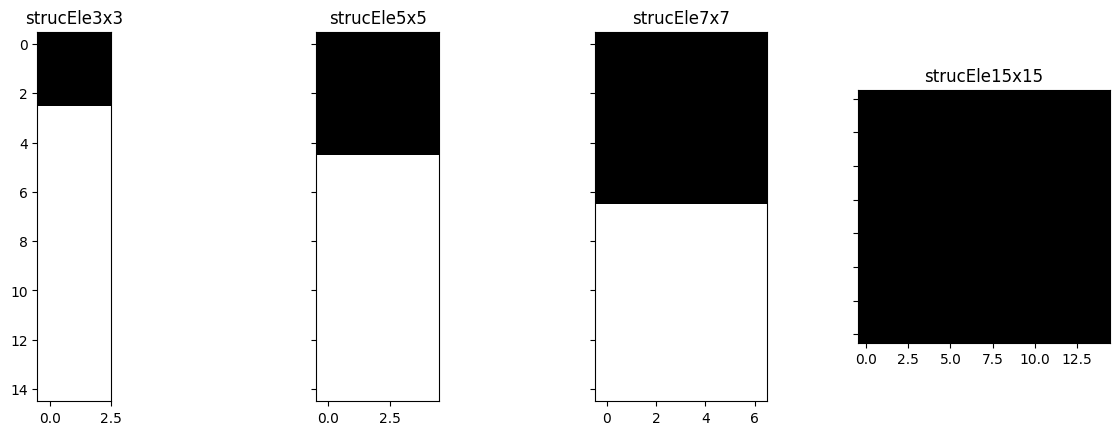

In [7]:
# Now, we define structuring elements

strucEle3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
strucEle5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strucEle7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))        
strucEle15x15 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))

plot_image([strucEle3x3, strucEle5x5, strucEle7x7, strucEle15x15], cmap='gray', captions = ["strucEle3x3", "strucEle5x5", "strucEle7x7", "strucEle15x15"])

imgThreshCopy height720
imgThreshCopy width1280
imgThreshCopy height720
imgThreshCopy width1280


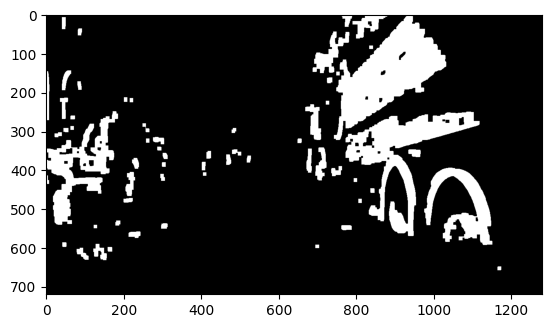

In [8]:


for i in range(2):
    imgThresh = cv2.dilate(imgThresh,strucEle5x5,iterations = 2)
    imgThresh = cv2.erode(imgThresh,strucEle5x5,iterations = 1)

    imgThreshCopy = imgThresh.copy()
    if(SHOW_DEBUG_STEPS):        
        print ('imgThreshCopy height' + str(imgThreshCopy.shape[0]))
        print ('imgThreshCopy width' + str(imgThreshCopy.shape[1]))
        
plt.imshow(imgThresh, cmap = 'gray')    
plt.show()



In [9]:
def drawAndShowContours(wd,ht,contours,strImgName):
    global SCALAR_WHITE
    global SHOW_DEBUG_STEPS
    
    # Defining a blank frame. Since it is initialised with zeros, it will be black. Will add all the coutours in this image.
    blank_image = np.zeros((ht,wd,3), np.uint8)
    #cv2.drawContours(blank_image,contours,10,SCALAR_WHITE,-1)
    
    # Adding all possible contour to the blank frame. Contour is white 
    cv2.drawContours(blank_image,contours,-1,SCALAR_WHITE,-1)
    
    
    # For better clarity, lets just view countour 9
    blank_image_contour_9 = np.zeros((ht,wd,3), np.uint8)
    
    # Let's just add contour 9 to the blank image and view it
    cv2.drawContours(blank_image_contour_9,contours,8,SCALAR_WHITE,-1)
    
    # Plotting
    plot_image([blank_image, blank_image_contour_9], cmap='gray', captions = ["All possible contours", "Only the 9th contour"])

        
    return blank_image
    

contours.shape: 61


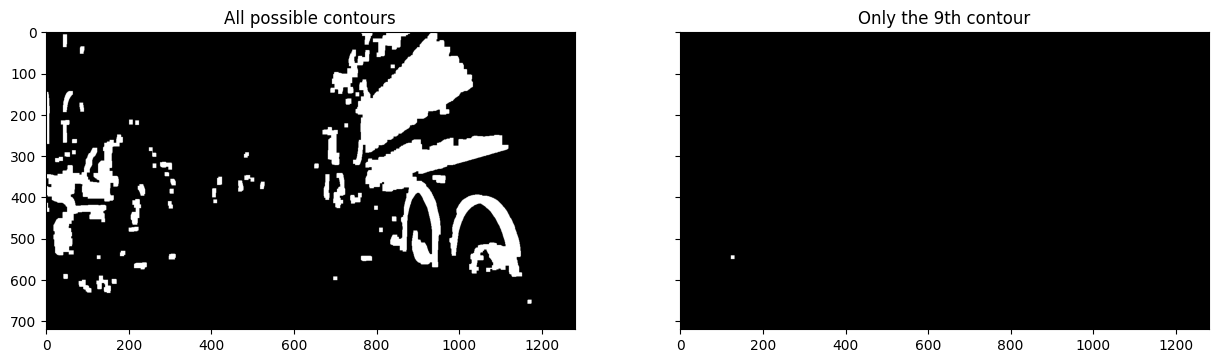

In [10]:
# Now, we move on to the contour mapping portion    
        
contours, hierarchy = cv2.findContours(imgThreshCopy,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
im2 = drawAndShowContours(wd,ht,contours,'imgContours')

# Printing all the coutours in the image.
if(SHOW_DEBUG_STEPS):
    print ('contours.shape: ' + str(len(contours)))